In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

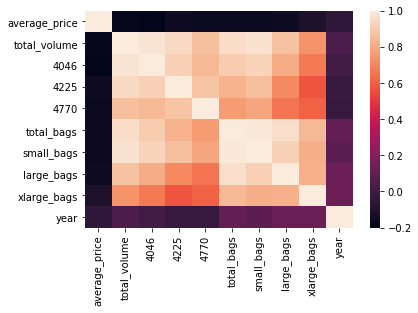

In [2]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
corr = df.corr()


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [3]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
df = df[df['geography'] == 'Total U.S.']
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
grouped = df.groupby(['year', 'month']).mean()
grouped.head()

<ipython-input-4-614015c4e56c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].apply(lambda x: x.split('-')[1])
<ipython-input-4-614015c4e56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].apply(lambda x: x.split('-')[0])


average_price  total_volume          4046          4225  \
year month                                                            
2015 01            1.2325  1.505669e+07  6.111703e+06  6.149645e+06   
     02            1.2275  1.718793e+07  7.311859e+06  6.808472e+06   
     03            1.2560  1.587573e+07  6.694906e+06  6.104917e+06   
     04            1.2975  1.631906e+07  7.219332e+06  5.908519e+06   
     05            1.2570  1.827522e+07  8.138431e+06  6.689806e+06   

                    4770    total_bags    small_bags    large_bags  \
year month                                                           
2015 01     415870.75750  2.379471e+06  1.954999e+06  418093.47250   
     02     490406.29000  2.577192e+06  2.156895e+06  409537.64625   
     03     468142.75500  2.607765e+06  2.238782e+06  354610.27900   
     04     451439.66625  2.739770e+06  2.329308e+06  399510.53375   
     05     479464.84300  2.967514e+06  2.504960e+06  451378.08400   

            xlarge_bags  
year month               
2015 01      6378.57750  
     02     10759.73875  
     03     14372.52300  
     04     10951.84625  
     05     11175.70600

In [5]:
data = pd.DataFrame({'average_price': grouped['average_price'],
                     'total_volume': grouped['total_volume']})

x, y = data['average_price'], data['total_volume']



In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)
xTrain, yTrain = np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1)
xTest, yTest = np.array(xTest).reshape(-1,1), np.array(yTest).reshape(-1,1)

In [7]:
res = LinearRegression().fit(xTrain, yTrain)

In [8]:
score = res.score(np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1))
print(f'RSQ = {score}')

RSQ = 0.07840783600544443


In [9]:
predictions = res.predict(xTest)
actual = []
predictionCol = []
for a in yTest:
    actual.append(a[0])
for p in predictions:
    predictionCol.append(p[0])
predictionDF = pd.DataFrame({'Predicted': predictionCol,
                              'Actual': actual})
predictionDF.head()

,Predicted,Actual
0,2.037046e+07,2.354767e+07
1,1.979139e+07,1.440388e+07
2,1.989985e+07,2.022408e+07
3,2.046605e+07,1.827522e+07
4,2.057267e+07,2.377602e+07


In [10]:
# Result analysis
predictionDF['Error'] = predictionDF['Actual'] - predictionDF['Predicted']
predictionDF['Error'] = predictionDF['Error'].apply(abs)
predictionDF['pctError'] = (predictionDF['Error'] / predictionDF['Actual']) * 100
predictionDF.head()

,Predicted,Actual,Error,pctError
0,2.037046e+07,2.354767e+07,3.177212e+06,13.492682
1,1.979139e+07,1.440388e+07,5.387510e+06,37.403182
2,1.989985e+07,2.022408e+07,3.242288e+05,1.603182
3,2.046605e+07,1.827522e+07,2.190831e+06,11.987992
4,2.057267e+07,2.377602e+07,3.203348e+06,13.473023


In [11]:
meanAbsErr = predictionDF['pctError'].mean()
print(f'Mean absolute Error = {round(meanAbsErr, 2)}%')

Mean absolute Error = 16.42%


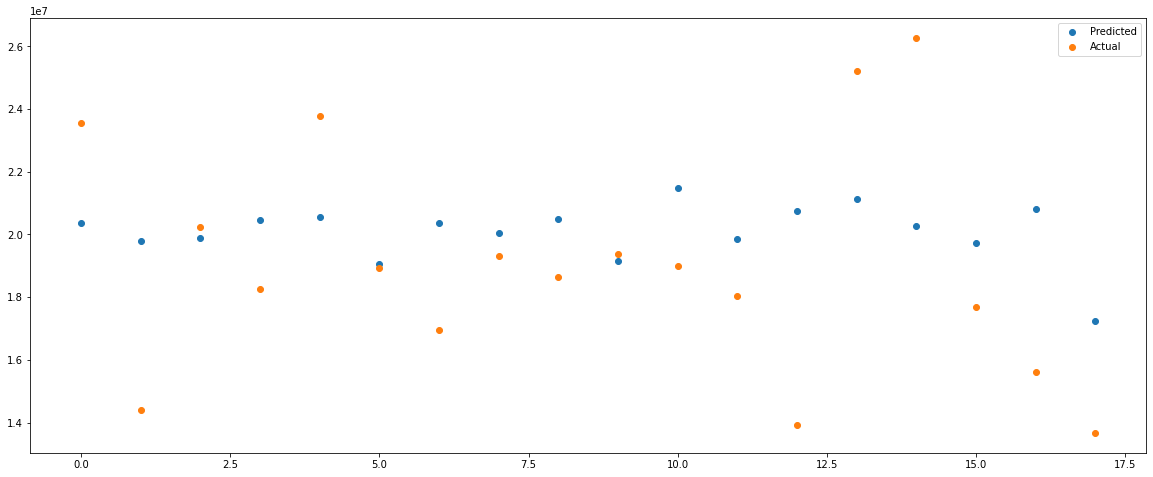

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(predictionDF.index, predictionDF['Predicted'])
plt.scatter(predictionDF.index, predictionDF['Actual'])
plt.legend(['Predicted', 'Actual'])
plt.show()

Mostly overly-fitted linear measurements, However this model somewhat accurately follows dips in the avocado market (presumably droughts or other big market events)

In [13]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['type'] = df['type'].apply(lambda x: 1 if x == 'organic' else 0)
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,Albany,01
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,Albany,01
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,Atlanta,01
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,Atlanta,01
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,Baltimore/Washington,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,1,2020,Total U.S.,11
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,0,2020,West,11
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,1,2020,West,11
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,0,2020,West Tex/New Mexico,11


In [14]:
df = pd.merge(df, pd.get_dummies(df['year']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['geography']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['month']), left_index=True, right_index=True)
for col in ['4046', '4225', '4770', 'small_bags', 'large_bags']:
    del df[col]
df.columns

Index(['date', 'average_price', 'total_volume', 'total_bags', 'xlarge_bags',
       'type', 'year', 'geography', 'month', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syra

In [15]:
y = df['average_price']
x = df[['total_volume', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12' ]]
# Avoid perfect multicollinearity for all dummy variables
for col in ['2015', 'Albany', '01']:
    del x[col]
x

,total_volume,2016,2017,2018,2019,2020,Atlanta,Baltimore/Washington,Boise,Boston,...,03,04,05,06,07,08,09,10,11,12
0,40873.28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1373.95,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435021.49,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3846.69,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,788025.06,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,1583056.27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33041,5811114.22,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33042,289961.27,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33043,822818.75,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)


In [17]:
xTrain

,total_volume,2016,2017,2018,2019,2020,Atlanta,Baltimore/Washington,Boise,Boston,...,03,04,05,06,07,08,09,10,11,12
14333,461109.34,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15420,23238.29,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25966,5381.40,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24134,6960.03,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
20232,10753.70,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22572,12556.39,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22766,21993.08,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20480,66347.81,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
18272,31489.27,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [18]:
res = LinearRegression().fit(xTrain, yTrain)
score = res.score(xTrain, yTrain)
print(f'RSQ = {score}')

RSQ = 0.27447894658780636


In [19]:
xTest['prediction'] = res.predict(xTest)
xTest

<ipython-input-19-c8bdccf9a939>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['prediction'] = res.predict(xTest)


,total_volume,2016,2017,2018,2019,2020,Atlanta,Baltimore/Washington,Boise,Boston,...,04,05,06,07,08,09,10,11,12,prediction
15878,37155.43,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1.682685
5428,1991.44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.332933
3436,353930.82,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1.458730
32545,234025.20,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.277636
6805,496190.99,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1.188220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8331,860170.92,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.490762
5282,50632.73,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.309538
32963,375266.35,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.140107
11957,159133.19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.249002


In [20]:
xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


<ipython-input-20-0f368dbf8cd1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = (xTest['prediction'] - yTest) / yTest
<ipython-input-20-0f368dbf8cd1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xTest['pctAbsDiff'] = xTest['pctAbsDiff'].apply(lambda x: x * 100)


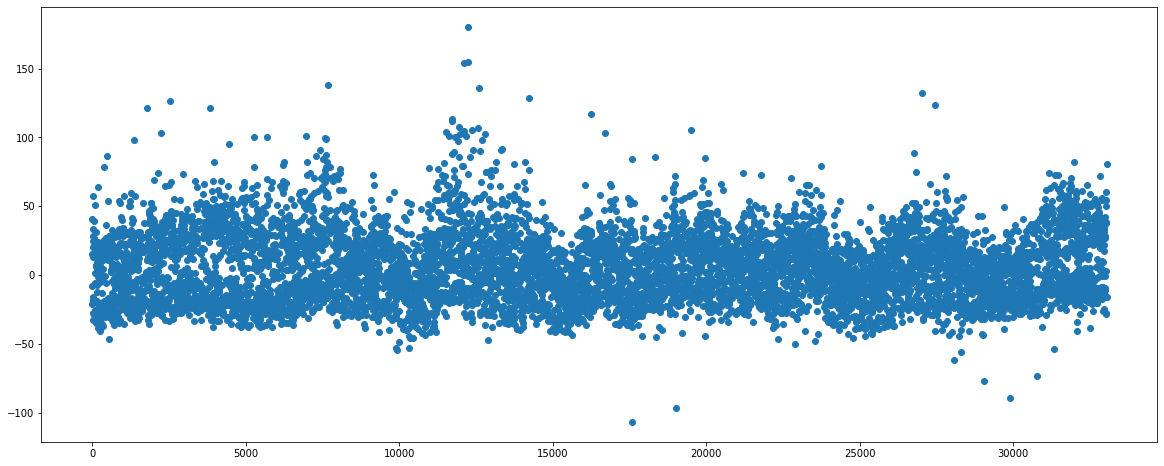

In [21]:
plt.figure(figsize=(20,8))
plt.scatter(xTest.index, xTest['pctAbsDiff'])

<AxesSubplot:>

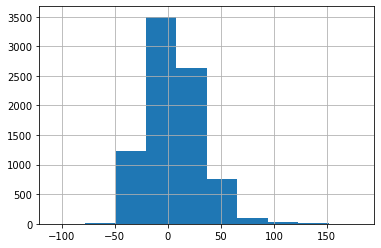

In [22]:
xTest['pctAbsDiff'].hist()

In [23]:
res.coef_

array([-2.88792227e-08, -3.89539077e-02,  1.42830170e-01, -1.92336688e-02,
        3.54874257e-02, -8.77373331e-02, -2.01921001e-01, -1.38471100e-02,
       -7.19353721e-02,  4.29479174e-02, -1.12221853e-01,  4.24513449e-02,
        3.09869850e-02,  3.69121880e-02, -2.67270811e-01, -2.86473747e-01,
       -4.00498397e-01, -2.20496521e-01, -2.38975850e-01, -6.61453544e-02,
       -1.39390599e-01, -1.15063371e-01,  2.74790527e-01, -4.13973520e-01,
       -2.43337350e-01, -1.05526539e-01, -1.37570440e-01, -1.44168530e-01,
       -2.50350708e-01, -1.56410123e-01, -8.34935799e-02, -2.86345039e-01,
       -2.72197262e-01,  1.85226313e-01,  1.11190282e-01, -3.61700097e-02,
       -1.29713305e-01,  2.05682004e-02, -2.79058384e-01, -1.74902564e-01,
       -1.30636234e-01, -8.87141685e-02,  5.56251508e-02, -2.48459725e-01,
       -2.57909718e-01,  8.10246107e-02, -4.08410663e-02,  2.45144573e-01,
        6.63808644e-02, -1.32285653e-01, -2.98370532e-01, -1.20190006e-01,
       -1.76226895e-03, -

In [27]:
colDict = {}

# Add back in the columsn we deleted for multicollinearity reasons

for xCol, coef in zip(x.columns, res.coef_):
    colDict[xCol] = coef
for col in ['2015', 'Albany', '01']:
    colDict[col] = 0

In [28]:
colDict

{'total_volume': -2.887922268295118e-08,
 '2016': -0.038953907725157555,
 '2017': 0.1428301703997031,
 '2018': -0.01923366882952917,
 '2019': 0.035487425656186546,
 '2020': -0.08773733309858661,
 'Atlanta': -0.2019210012179813,
 'Baltimore/Washington': -0.013847110047213174,
 'Boise': -0.07193537210015466,
 'Boston': 0.04294791740730347,
 'Buffalo/Rochester': -0.11222185301370108,
 'California': 0.04245134487357047,
 'Charlotte': 0.030986984956014152,
 'Chicago': 0.03691218795849349,
 'Cincinnati/Dayton': -0.26727081071587766,
 'Columbus': -0.2864737471590423,
 'Dallas/Ft. Worth': -0.40049839724336905,
 'Denver': -0.22049652075129525,
 'Detroit': -0.23897585019179962,
 'Grand Rapids': -0.06614535435926414,
 'Great Lakes': -0.13939059918848715,
 'Harrisburg/Scranton': -0.11506337131619013,
 'Hartford/Springfield': 0.27479052742848503,
 'Houston': -0.4139735197087133,
 'Indianapolis': -0.24333734988950087,
 'Jacksonville': -0.10552653852492308,
 'Las Vegas': -0.13757043981860181,
 'Los A

In [26]:
with open(coefficients.json)

15878    1.81
5428     1.66
3436     1.05
32545    0.85
6805     0.98
         ... 
8331     1.18
5282     1.17
32963    0.97
11957    1.03
12368    2.26
Name: average_price, Length: 8262, dtype: float64